## Figure S2. Temporal coherence with the AOI of coherence-based network modification

In [15]:
%matplotlib inline
import os
from matplotlib import pyplot as plt
from mintpy import view
from mintpy.defaults.plot import *

work_dir = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/tcoh')
os.chdir(work_dir)
print('Go to directory:', work_dir)

# AOI for coherence-based network modification
lat0, lat1, lon0, lon1 = 31.88, 31.94, 130.85, 130.91
lats = [lat0, lat1, lat1, lat0, lat0]
lons = [lon0, lon0, lon1, lon1, lon0]

## Dataset Initiation
proj_dir_base = os.path.expanduser('~/insarlab/Kirishima')
tcoh_files = [os.path.join(proj_dir_base, i) for i in [
    'KirishimaAlosAT424/mintpyAll/temporalCoherence.h5',
    'KirishimaAlosDT73/mintpyAll/temporalCoherence.h5',
    'KirishimaAlos2AT131/mintpyAll/temporalCoherence.h5',
    'KirishimaAlos2DT23/mintpyAll/temporalCoherence.h5',
]]

dem_file = os.path.expanduser('~/insarlab/Kirishima/DEM/gsi10m.dem.wgs84')
opt = ' --contour-step 100 --contour-smooth 0.0  --shade-az 45 --dpi 300 '
opt =  ' --dem {}  --contour-step 100 --contour-smooth 0.0 --shade-az 45 '.format(dem_file)
opt += ' -c gray '
opt += ' --notitle --notick --fontsize 12 --ref-size 3 --nocbar --alpha 0.75 '
#opt += ' --lalo-step 0.03 --lat-label vertical --lalo-loc 0 0 0 0 '
opt += ' --scalebar 0.2 0.13 0.04 --scalebar-pad 0.05 --noverbose '
#opt += ' --sub-lat 31.895 31.955 --sub-lon 130.843 130.900 '

Go to directory: /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/tcoh


save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/tcoh/tcoh.png


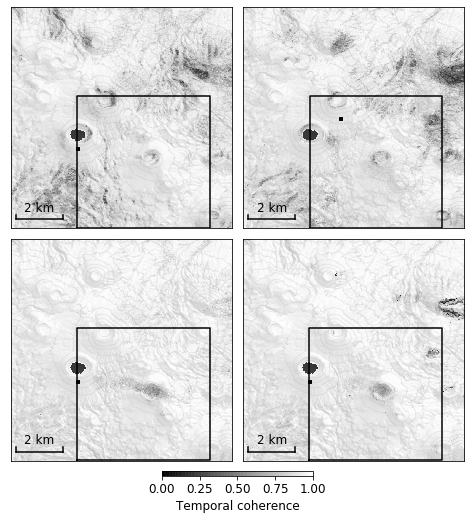

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=[7, 7])
axs = axs.flatten()

for i in range(len(tcoh_files)):
    ax = axs[i]
    fname = tcoh_files[i]
    
    cmd = 'view.py {f} {o}'.format(f=fname, o=opt)
    data, atr, inps = view.prep_slice(cmd)
    ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)

    # point of interest
    ax.plot(lons, lats, 'k-')
fig.subplots_adjust(hspace=0.05, wspace=0.05, left=0.05, right=0.95, top=0.95, bottom=0.05)

# colorbar
cax = fig.add_axes([0.35, 0.02, 0.3, 0.01])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')#, ticks=[-2.5, 0, 2.5])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Temporal coherence', fontsize=font_size)

# output
out_file = os.path.abspath('tcoh.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()